In [1]:
!pip install imbalanced-learn



In [2]:
!pip install shap

In [3]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import shap



In [4]:
warnings.filterwarnings("ignore")

# Define the file path
file_path = r"C:\Users\manos\Desktop\dataset.csv"

# Load dataset
df = pd.read_csv(file_path)
df.drop_duplicates(subset=['track_id'], inplace=True)  # Remove duplicates based on track_id

In [5]:
unique_genres = df["track_genre"].unique()
len(unique_genres)

113

In [6]:


# Keep track of original information
reference_columns = ['track_id', 'artists', 'track_name', 'track_genre']
reference_df = df[reference_columns].copy()

# Remove irrelevant columns except 'genre'
columns_to_drop = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'explicit', 'track_genre']
X = df.drop(columns=columns_to_drop, axis=1)
y = df['track_genre']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)


In [397]:
X

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,384999,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,385000,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,271466,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,283893,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [13]:
reference_df

,track_id,artists,track_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost - Acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Can't Help Falling In Love,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,acoustic
...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,Sleep My Little Boy,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,Water Into Light,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Miss Perfumado,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Friends,world-music


In [399]:
# Split the resampled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit-transform on training data
X_test_scaled = scaler.transform(X_test)  # Transform on test data

In [406]:
A= pd.DataFrame(X_train_scaled)
X_train_scaled

array([[-0.28793555, -0.17226141, -0.80073625, ...,  1.0038289 ,
        -0.60103901,  0.24818205],
       [-0.25179176, -0.45180571, -0.60189462, ..., -0.88519839,
        -1.0109144 ,  0.24818205],
       [ 0.36375255,  0.03228301,  0.23979658, ..., -0.61785277,
        -1.19193897,  0.24818205],
       ...,
       [-1.30506608, -0.24239093,  0.70945343, ...,  0.60428414,
        -0.74337458, -1.98924672],
       [-0.31162407,  0.52318963,  1.33296338, ...,  0.51419071,
         0.94950358,  0.24818205],
       [-0.95434438, -0.53459725,  0.63252688, ...,  1.39553945,
         1.69031342,  0.24818205]])

In [9]:
# Number of features in the original dataset (after dropping irrelevant columns)
n_features = X_train_scaled.shape[1]
print(f"Total number of components (features) in the dataset: {n_features}")

Total number of components (features) in the dataset: 13


In [311]:
# Apply KMeans clustering on the original data
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose an appropriate number of clusters
kmeans_labels = kmeans.fit_predict(X_train_scaled)

# Feature importance using SHAP
explainer = shap.Explainer(kmeans.predict, X_train_scaled)
shap_values = explainer(X_train_scaled)



PermutationExplainer explainer: 79101it [31:50, 41.18it/s]                           


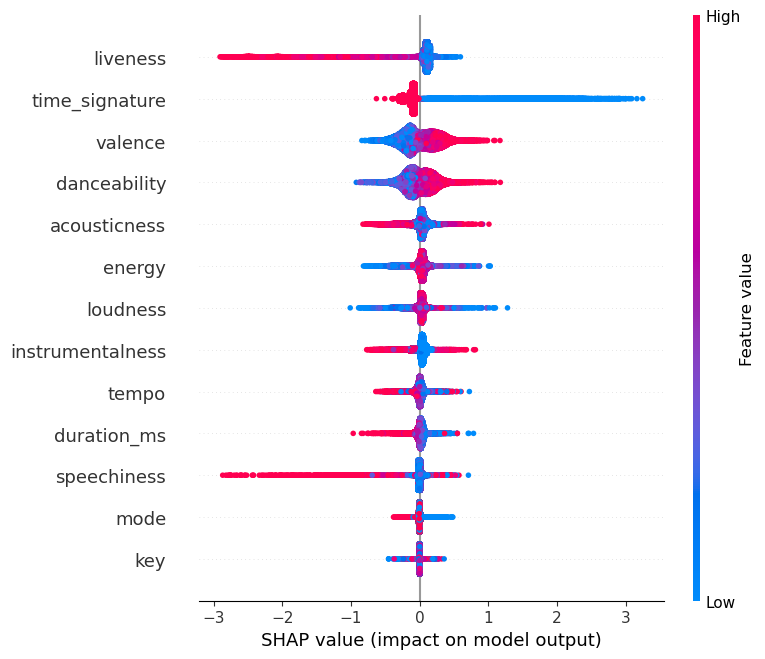

Cluster Prototypes (Centroids):
     duration_ms  danceability    energy       key   loudness      mode  \
0  235777.046532      0.534014  0.751553  5.223214  -7.420814  0.649897   
1  215971.915235      0.486402  0.301171  4.924824 -13.905463  0.700982   
2  263696.927787      0.493444  0.797990  5.367898  -6.123003  0.541685   
3  207231.254311      0.686071  0.697690  5.244905  -6.663092  0.573776   
4  213515.376245      0.410649  0.320994  4.855172 -14.090592  0.652490   

   speechiness  acousticness  instrumentalness  liveness   valence  \
0     0.190543      0.344951          0.063861  0.727051  0.506767   
1     0.053538      0.744862          0.291428  0.157728  0.322495   
2     0.076598      0.074977          0.232267  0.191442  0.327331   
3     0.093546      0.246729          0.038662  0.166303  0.666879   
4     0.059862      0.710353          0.275170  0.185608  0.298192   

        tempo  time_signature  
0  121.450558        3.926339  
1  109.281372        4.040350  


In [312]:
# SHAP summary plot
shap.summary_plot(shap_values, X_train_scaled, feature_names=X.columns)

# Transform cluster centers back to original space
cluster_centers_original_space = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(cluster_centers_original_space, columns=X.columns)
print("Cluster Prototypes (Centroids):")
print(centroids_df)

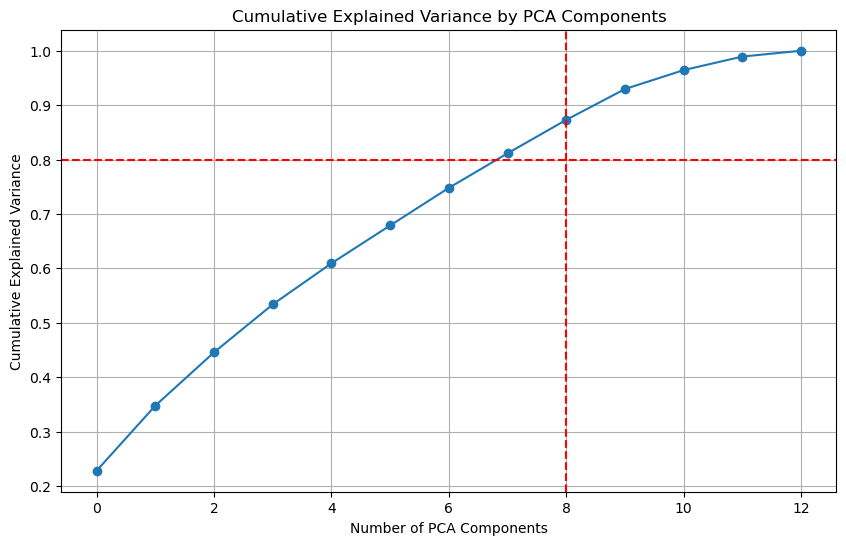

Number of PCA components to explain at least 95% variance: 8


In [25]:
# Determine the number of components to explain at least 80% of the variance
pca = PCA().fit(X_train_scaled)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_80_var = np.argmax(cumulative_explained_variance >= 0.80) + 1

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.axvline(x=n_components_80_var, color='r', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

print(f"Number of PCA components to explain at least 80% variance: {n_components_80_var}")

In [26]:
# Apply PCA with the determined number of components
pca = PCA(n_components=n_components_80_var)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# LDA for dimensionality reduction (assuming we have train_clusters from KMeans)
kmeans_for_lda = KMeans(n_clusters=12, random_state=0)
train_clusters = kmeans_for_lda.fit_predict(X_train_pca)
lda = LDA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_lda = lda.fit_transform(X_train_scaled, train_clusters)
X_test_lda = lda.transform(X_test_scaled)

# Find the optimal number of clusters using KMeans
k_values = range(2, 21)  # Try from 2 to 20 clusters
sse = []  # Collect SSE values
silhouette_scores = []  # Collect Silhouette Scores
davies_bouldin_scores = []  # Collect Davies-Bouldin Scores

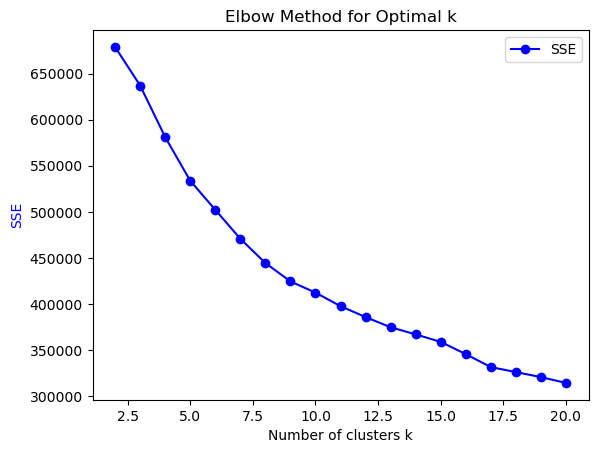

In [27]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_pca)  # Fit on PCA data
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_pca, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X_train_pca, kmeans.labels_))

# Visualize SSE and Silhouette Score for choosing the optimal k
fig, ax1 = plt.subplots()

ax1.plot(k_values, sse, 'o-', color='blue', label='SSE')  # SSE plot

ax1.set_xlabel('Number of clusters k')
ax1.set_ylabel('SSE', color='blue')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.title('Elbow Method for Optimal k')
plt.show()

In [28]:
# Select the best k based on Silhouette Score
best_k_pca = 9

# Cluster with the best number of clusters using KMeans (PCA)
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=0)
kmeans_pca.fit(X_train_pca)
train_clusters_pca = kmeans_pca.labels_
test_clusters_pca = kmeans_pca.predict(X_test_pca)

# Evaluate DBSCAN
kmeans_silhouette = silhouette_score(X_train_pca, train_clusters_pca)
kmeans_davies_bouldin = davies_bouldin_score(X_train_pca, train_clusters_pca)

In [29]:
kmeans_silhouette, kmeans_davies_bouldin

(0.1388985044148169, 1.601406254233024)

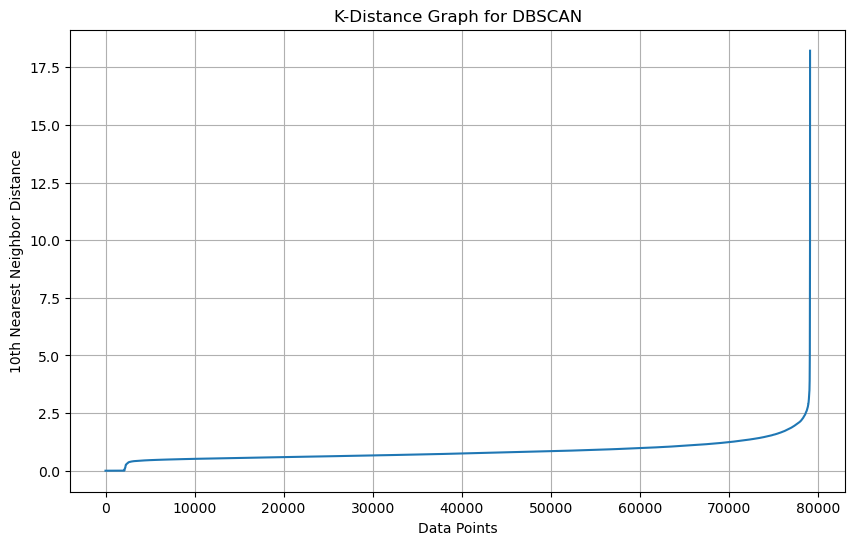

In [30]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Determine the optimal epsilon using k-distance graph
neighbors = NearestNeighbors(n_neighbors= 10)
neighbors_fit = neighbors.fit(X_train_pca)
distances, indices = neighbors_fit.kneighbors(X_train_pca)

# Sort the distances
distances = np.sort(distances[:, 9], axis=0)

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN')
plt.xlabel('Data Points')
plt.ylabel('10th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

In [31]:
# Set epsilon based on the elbow point in the graph
epsilon = 1.5  # Based on visual inspection
min_samples = 10 + 1  # Typically, k + 1

# Apply DBSCAN with the chosen epsilon and min_samples
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_train_pca)

# Evaluate DBSCAN
dbscan_silhouette = silhouette_score(X_train_pca, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(X_train_pca, dbscan_labels)

In [32]:
dbscan_silhouette, dbscan_davies_bouldin

(0.2835045791132073, 1.469623648472385)

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the autoencoder model
input_dim = X_train_scaled.shape[1]
encoding_dim = 2  # Reduce to 2 dimensions for visualization

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
encoder_output = Dense(encoding_dim, activation='linear')(encoder)

# Decoder
decoder = Dense(64, activation='relu')(encoder_output)
decoder = Dense(128, activation='relu')(decoder)
decoder_output = Dense(input_dim, activation='linear')(decoder)

# Autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

# Encoder model to extract the encoded (latent) space
encoder_model = Model(inputs=input_layer, outputs=encoder_output)

# Get the encoded representations
X_train_encoded = encoder_model.predict(X_train_scaled)
X_test_encoded = encoder_model.predict(X_test_scaled)


Epoch 1/50
248/248 [==============================] - 2s 7ms/step - loss: 0.6109 - val_loss: 0.5189
Epoch 2/50
248/248 [==============================] - 2s 7ms/step - loss: 0.4934 - val_loss: 0.4669
Epoch 3/50
248/248 [==============================] - 2s 6ms/step - loss: 0.4522 - val_loss: 0.4444
Epoch 4/50
248/248 [==============================] - 2s 6ms/step - loss: 0.4328 - val_loss: 0.4296
Epoch 5/50
248/248 [==============================] - 2s 7ms/step - loss: 0.4180 - val_loss: 0.4168
Epoch 6/50
248/248 [==============================] - 2s 7ms/step - loss: 0.4060 - val_loss: 0.4045
Epoch 7/50
248/248 [==============================] - 2s 7ms/step - loss: 0.3947 - val_loss: 0.3954
Epoch 8/50
248/248 [==============================] - 2s 7ms/step - loss: 0.3881 - val_loss: 0.3874
Epoch 9/50
248/248 [==============================] - 2s 6ms/step - loss: 0.3787 - val_loss: 0.3815
Epoch 10/50
248/248 [==============================] - 2s 7ms/step - loss: 0.3721 - val_loss: 0.3746

In [34]:
# Determine the optimal number of clusters using the Elbow method and Silhouette Score
k_values_2 = range(2, 21)
sse_autoencoder_2 = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train_encoded)
    sse_autoencoder_2.append(kmeans.inertia_)

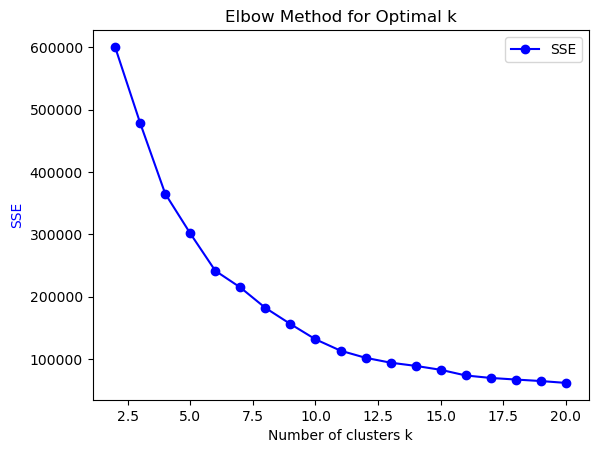

In [35]:
# Visualize SSE for choosing the optimal k
fig, ax1 = plt.subplots()

ax1.plot(k_values, sse_autoencoder_2, 'o-', color='blue', label='SSE')  # SSE plot

ax1.set_xlabel('Number of clusters k')
ax1.set_ylabel('SSE', color='blue')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.title('Elbow Method for Optimal k')
plt.show()

In [78]:
# Select the best k based on Silhouette Score for autoencoder
best_k_autoencoder = 9

# Cluster the encoded data using KMeans with the optimal number of clusters
kmeans_autoencoder = KMeans(n_clusters=best_k_autoencoder, random_state=0)
kmeans_autoencoder.fit(X_train_encoded)
train_clusters_autoencoder = kmeans_autoencoder.labels_
test_clusters_autoencoder = kmeans_autoencoder.predict(X_test_encoded)

# Evaluate the clustering performance on the encoded data
silhouette_autoencoder = silhouette_score(X_train_encoded, train_clusters_autoencoder)
davies_bouldin_autoencoder = davies_bouldin_score(X_train_encoded, train_clusters_autoencoder)

print(f"Autoencoder + KMeans Silhouette Score: {silhouette_autoencoder}")
print(f"Autoencoder + KMeans Davies-Bouldin Score: {davies_bouldin_autoencoder}")


Autoencoder + KMeans Silhouette Score: 0.5344880819320679
Autoencoder + KMeans Davies-Bouldin Score: 0.6779005223427343


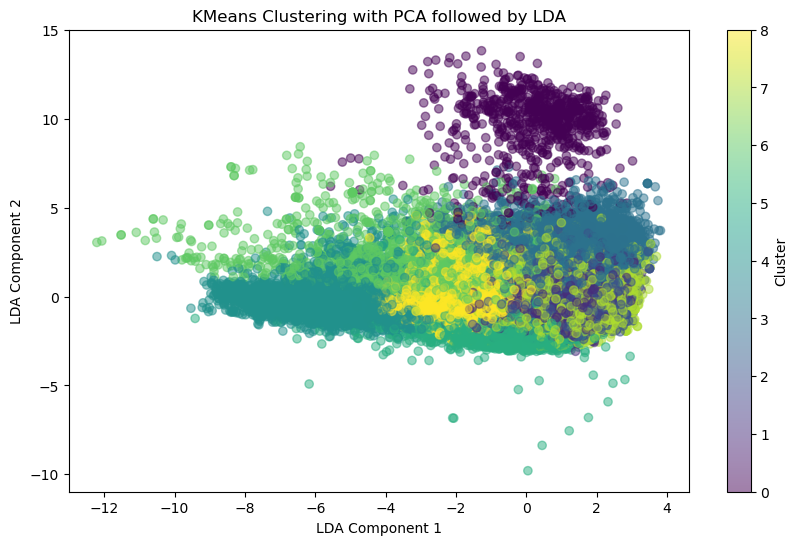

In [43]:
# Apply LDA for further dimensionality reduction to 2 dimensions
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_pca, train_clusters_pca)

# Visualize the clustering results using the 2D LDA components
plt.figure(figsize=(10, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=train_clusters_pca, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering with PCA followed by LDA')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar(label='Cluster')
plt.show()

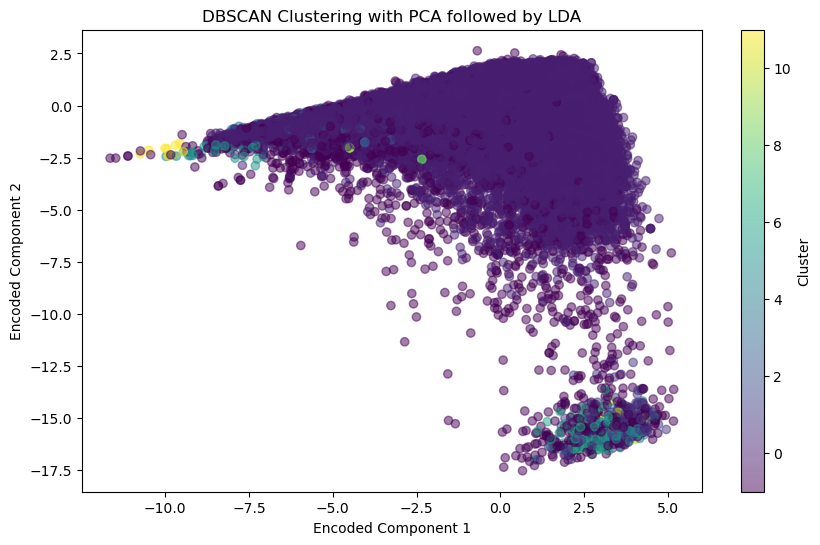

In [38]:
plt.figure(figsize=(10, 6))
# Plot all points with color based on their DBSCAN cluster label
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering with PCA followed by LDA')
plt.xlabel('Encoded Component 1')
plt.ylabel('Encoded Component 2')
plt.colorbar(label='Cluster')
plt.show()

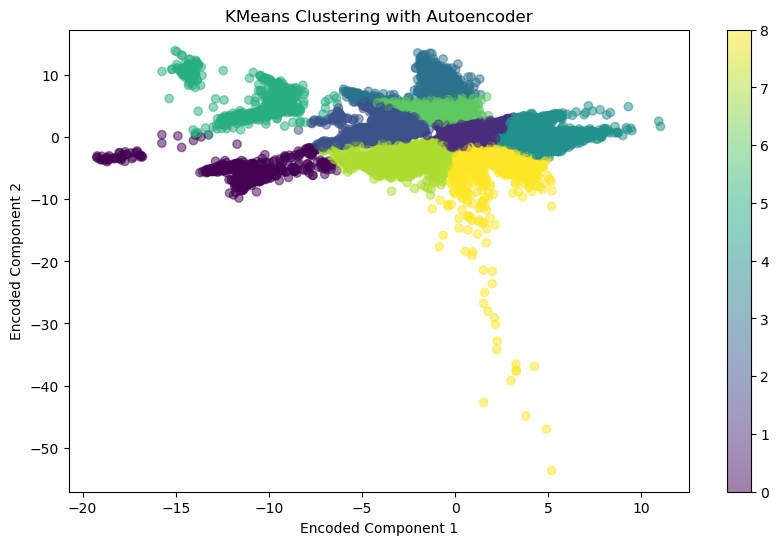

In [44]:
# Visualize the clusters from the autoencoder
plt.figure(figsize=(10, 6))
plt.scatter(X_train_encoded[:, 0], X_train_encoded[:, 1], c=train_clusters_autoencoder, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering with Autoencoder')
plt.xlabel('Encoded Component 1')
plt.ylabel('Encoded Component 2')
plt.colorbar()
plt.show()

In [ ]:
# %%
# DataFrame to compare the scores
scores_df = pd.DataFrame({
    'Method': ['KMeans (PCA)', 'Autoencoder + KMeans', 'DBSCAN'],
    'Silhouette Score': [kmeans_silhouette, silhouette_autoencoder, dbscan_silhouette],
    'Davies-Bouldin Score': [kmeans_davies_bouldin, davies_bouldin_autoencoder, dbscan_davies_bouldin]
})



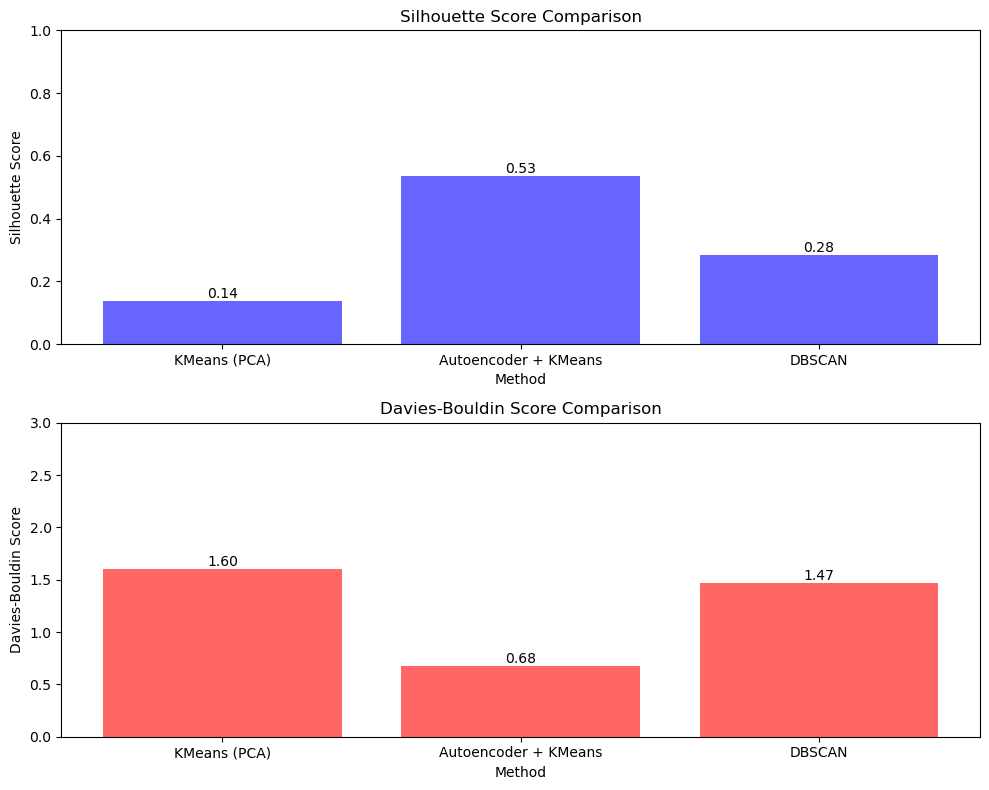

In [418]:
# Plot for Silhouette Scores
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot for Silhouette Scores
bars = ax[0].bar(scores_df['Method'], scores_df['Silhouette Score'], color='blue', alpha=0.6)
ax[0].set_title('Silhouette Score Comparison')
ax[0].set_ylabel('Silhouette Score')
ax[0].set_ylim(0, 1)

# Add text annotations for Silhouette Scores
for bar in bars:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

# Plot for Davies-Bouldin Scores
bars = ax[1].bar(scores_df['Method'], scores_df['Davies-Bouldin Score'], color='red', alpha=0.6)
ax[1].set_title('Davies-Bouldin Score Comparison')
ax[1].set_ylabel('Davies-Bouldin Score')
ax[1].set_ylim(0, 3)

# Add text annotations for Davies-Bouldin Scores
for bar in bars:
    height = bar.get_height()
    ax[1].text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

# Set x-axis labels
for a in ax:
    a.set_xlabel('Method')

# Tight layout for better spacing
plt.tight_layout()
plt.show()

In [334]:
original_feature_names = X.columns
original_feature_names

Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [345]:
len(np.unique(train_clusters_autoencoder))

9

In [367]:
import numpy as np
import pandas as pd

# Find the 11 nearest songs for a random test song using Autoencoder
np.random.seed(38)
random_index = np.random.randint(0, X_test_encoded.shape[0])
random_test_song_encoded = X_test_encoded[random_index]

random_song_cluster_autoencoder = kmeans_autoencoder.predict(random_test_song_encoded.reshape(1, -1))[0]
same_cluster_songs_encoded = X_train_encoded[train_clusters_autoencoder == random_song_cluster_autoencoder]

distances_encoded = np.linalg.norm(same_cluster_songs_encoded - random_test_song_encoded, axis=1)
nearest_songs_indices_encoded = np.argsort(distances_encoded)[:11]

# Get the nearest songs in the encoded space
nearest_songs_encoded = same_cluster_songs_encoded[nearest_songs_indices_encoded]

# Find the corresponding original indices
same_cluster_songs_original_indices = np.where(train_clusters_autoencoder == random_song_cluster_autoencoder)[0]
nearest_songs_original_indices = same_cluster_songs_original_indices[nearest_songs_indices_encoded]

# Get the original features of the nearest songs
nearest_songs_features_encoded = X_train_scaled[nearest_songs_original_indices]
nearest_songs_df_encoded = pd.DataFrame(scaler.inverse_transform(nearest_songs_features_encoded), columns=original_feature_names)

# Adding the original indices to the DataFrame for reference
nearest_songs_df_encoded['original_index'] = nearest_songs_original_indices


# Get the original features of the random test song
random_test_song_original = scaler.inverse_transform(X_test_scaled[random_index].reshape(1, -1))
random_test_song_df = pd.DataFrame(random_test_song_original, columns=original_feature_names)
random_test_song_df['original_index'] = random_index


# Safely reindex to avoid KeyErrors
aligned_reference_df2 = reference_df.reindex(random_test_song_df['original_index']).reset_index(drop=True)

# Map final similar songs to original data
random_test_song_df_with_details = pd.concat([random_test_song_df.reset_index(drop=True), aligned_reference_df2], axis=1)

random_test_song_df_with_details


,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,original_index,track_id,artists,track_name,track_genre
0,120760.0,0.606,0.329,10.0,-14.312,1.0,0.0249,0.616,0.0,0.121,0.87,99.408,3.0,32161,6HhrMBN43RnGlGv7vIdnM5,Yellow Claw;Ayden,Till It Hurts (feat. Ayden),electronic


In [379]:
# Assuming reference_df is the original DataFrame with song details
# Ensure the index is of integer type
reference_df.index = reference_df.index.astype(int)

# Check which indices are missing in reference_df
missing_indices = nearest_songs_df_encoded['original_index'][~nearest_songs_df_encoded['original_index'].isin(reference_df.index)]
if not missing_indices.empty:
    print(f"Missing indices in reference_df: {missing_indices.tolist()}")

# Safely reindex to avoid KeyErrors
aligned_reference_df = reference_df.reindex(nearest_songs_df_encoded['original_index']).reset_index(drop=True)

# Map final similar songs to original data
final_songs_with_details = pd.concat([nearest_songs_df_encoded.reset_index(drop=True), aligned_reference_df], axis=1)

final_songs_with_details

Missing indices in reference_df: [43528]


,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,original_index,track_id,artists,track_name,track_genre
0,158866.0,0.621000,0.395000,9.0,-12.138000,1.0,0.031100,0.640000,0.000000,0.330000,0.589000,98.146000,3.0,39914,5uiiPMD59eUxBPIqQYHMjV,LX;Maxwell;Bonez MC,Bunkerplatz,german
1,189328.0,0.513438,0.453684,7.0,-6.843753,1.0,0.037900,0.748704,0.000114,0.141087,0.636212,95.274790,3.0,19348,6scecOoBpMr3jV08gbSW3O,Lauren Alaina,Like My Mother Does - American Idol Performance,country
2,183337.0,0.531000,0.373000,11.0,-7.389000,0.0,0.042600,0.930000,0.000518,0.105000,0.597000,98.468000,3.0,32449,3WnBlq8F3XVl1BRf16EeGy,Babasónicos,Muñeco / Deléctrico - En Vivo,electronic
3,205689.0,0.376000,0.574000,7.0,-10.636000,1.0,0.057500,0.942000,0.028300,0.370000,0.912000,89.724000,3.0,20636,5gWTCWosl7R6Ksw1swyuxz,Ava Max,Maybe You're the Problem,dance
4,184805.0,0.500186,0.539504,8.0,-11.774848,1.0,0.031456,0.576113,0.246894,0.286857,0.634671,95.069516,3.0,72861,2fyDWKsx5904KnZMGllmAv,Loathe,A Sad Cartoon,metalcore
5,151400.0,0.477000,0.496000,4.0,-9.028000,1.0,0.030400,0.641000,0.000000,0.179000,0.639000,95.067000,3.0,43528,NaN,NaN,NaN,NaN
6,278595.0,0.568649,0.492489,8.0,-10.534931,1.0,0.027426,0.606202,0.003414,0.323500,0.600051,98.424103,3.0,45703,1Oqj6onkV4tLjPSwd06Xg7,Allan Soderbergh,Still So Beautiful,guitar
7,185173.0,0.656000,0.294000,9.0,-10.341000,0.0,0.075100,0.859000,0.000062,0.064500,0.530000,111.967000,3.0,25019,1MrcbZai6wumuSm6JJ6BUA,Gloria Gaynor,I Will Survive,disco
8,133035.0,0.492982,0.548682,3.0,-9.431922,0.0,0.067946,0.842401,0.000052,0.239152,0.621427,99.851726,3.0,60831,3kIbhygiWBVX9g4TGiRpUJ,Maharajan,単純な作業,j-dance
9,216480.0,0.552816,0.502648,7.0,-8.656261,0.0,0.033121,0.379052,0.000000,0.134211,0.275758,103.590604,3.0,30942,7grzdNt3eQRiBC70GksRp1,Afrojack;R3HAB;Au/Ra,Worlds On Fire (with R3HAB & Au/Ra),edm


In [393]:
unique_clusters_autoencoder = np.unique(train_clusters_autoencoder)

# Find and display 3 similar songs from each cluster for a random test song
final_songs_df = pd.DataFrame()

for cluster in unique_clusters_autoencoder:
    cluster_songs_encoded = X_train_encoded[train_clusters_autoencoder == cluster]
    distances = np.linalg.norm(cluster_songs_encoded - random_test_song_encoded, axis=1)
    closest_songs_indices = np.argsort(distances)[:3]
    closest_songs_encoded = cluster_songs_encoded[closest_songs_indices]

    # Find the corresponding original indices
    same_cluster_songs_original_indices = np.where(train_clusters_autoencoder == cluster)[0]
    closest_songs_original_indices = same_cluster_songs_original_indices[closest_songs_indices]

    # Get the original features of the closest songs
    closest_songs_features_encoded = X_train_scaled[closest_songs_original_indices]
    closest_songs_df_encoded = pd.DataFrame(scaler.inverse_transform(closest_songs_features_encoded), columns=original_feature_names)

    # Adding the original indices to the DataFrame for reference
    closest_songs_df_encoded['original_index'] = closest_songs_original_indices
    final_songs_df = pd.concat([final_songs_df, closest_songs_df_encoded], ignore_index=True)

# Check which indices are missing in reference_df
missing_indices = final_songs_df['original_index'][~final_songs_df['original_index'].isin(reference_df.index)]
if not missing_indices.empty:
    print(f"Missing indices in reference_df: {missing_indices.tolist()}")

# Safely reindex to avoid KeyErrors
aligned_reference_df = reference_df.reindex(final_songs_df['original_index']).reset_index(drop=True)

# Map final similar songs to original data
best_3_final_songs_with_details = pd.concat([final_songs_df.reset_index(drop=True), aligned_reference_df], axis=1)
best_3_final_songs_with_details


Missing indices in reference_df: [43910, 31059, 11687, 44020, 71300]


,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,original_index,track_id,artists,track_name,track_genre
0,173013.0,0.764564,0.623984,6.0,-7.064801,0.0,0.427239,0.177896,0.000002,0.252011,0.492377,88.386976,3.0,19205,4waVhpVhVC26pybh8ttm2a,Kacey Musgraves;Lana Del Rey,I'll Be Home For Christmas - From The Kacey Mu...,country
1,142397.0,0.711000,0.996000,10.0,0.654000,0.0,0.460000,0.414000,0.000004,0.924000,0.075900,110.128000,3.0,43910,NaN,NaN,NaN,NaN
2,165737.0,0.615020,0.635050,4.0,-10.702939,0.0,0.510078,0.413198,0.000002,0.574968,0.727957,87.016457,3.0,30354,3H7ihDc1dqLriiWXwsc2po,Topic;A7S,Breaking Me,edm
3,1149106.0,0.269000,0.605000,8.0,-18.124000,0.0,0.247000,0.906000,0.611000,0.119000,0.036500,119.101000,3.0,77186,7bKhZiXdRId109o1pRBwV5,Sorriso Maroto;Belo,100 Likes - Ao Vivo,pagode
4,859202.0,0.521356,0.114210,0.0,-19.459040,1.0,0.036952,0.831872,0.340400,0.111372,0.131219,128.934118,4.0,69651,7y4XcoRcRDFnVltwFp2XAm,Fejo;MC Mushti,Workil Aanu Karyam,malay
5,248000.0,0.062400,0.417000,11.0,-20.062000,1.0,0.140000,0.722000,0.979000,0.898000,0.038600,73.258000,4.0,28512,6vIUovlj8NGi1JfnzVUUBI,Krewella,Human,dub
6,158866.0,0.621000,0.395000,9.0,-12.138000,1.0,0.031100,0.640000,0.000000,0.330000,0.589000,98.146000,3.0,39914,5uiiPMD59eUxBPIqQYHMjV,LX;Maxwell;Bonez MC,Bunkerplatz,german
7,189328.0,0.513438,0.453684,7.0,-6.843753,1.0,0.037900,0.748704,0.000114,0.141087,0.636212,95.274790,3.0,19348,6scecOoBpMr3jV08gbSW3O,Lauren Alaina,Like My Mother Does - American Idol Performance,country
8,183337.0,0.531000,0.373000,11.0,-7.389000,0.0,0.042600,0.930000,0.000518,0.105000,0.597000,98.468000,3.0,32449,3WnBlq8F3XVl1BRf16EeGy,Babasónicos,Muñeco / Deléctrico - En Vivo,electronic
9,354000.0,0.177000,0.170000,3.0,-30.298000,0.0,0.044300,0.971000,0.957000,0.102000,0.243000,136.492000,3.0,46690,002qpSULhHAw6DGqFxbaO1,Tokyo Ghetto Pussy,Love Generation,happy


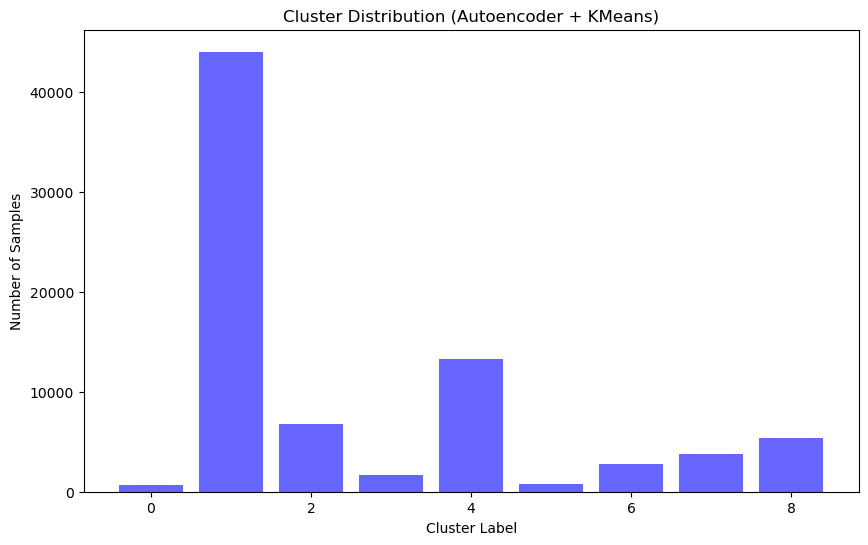

In [410]:
plt.figure(figsize=(10, 6))
unique, counts = np.unique(train_clusters_autoencoder, return_counts=True)
plt.bar(unique, counts, color='blue', alpha=0.6)
plt.title('Cluster Distribution (Autoencoder + KMeans)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.show()